In [545]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import auc,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC

from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
import pycountry
py.init_notebook_mode(connected=True)
import folium 
from folium import plugins
from datetime import datetime

%matplotlib inline

In [546]:
nCov = pd.read_csv('2019_nCoV_data.csv',parse_dates=['Date'])

In [547]:
nCov.dtypes

Sno                        int64
Date              datetime64[ns]
Province/State            object
Country                   object
Last Update               object
Confirmed                float64
Deaths                   float64
Recovered                float64
dtype: object

In [548]:
nCov

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,2020-01-22 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,2020-01-22 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,2020-01-22 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,2020-01-22 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1122,1123,2020-02-09 23:20:00,"Los Angeles, CA",US,2020-02-01 19:53:03,1.0,0.0,0.0
1123,1124,2020-02-09 23:20:00,"Madison, WI",US,2020-02-05 21:53:02,1.0,0.0,0.0
1124,1125,2020-02-09 23:20:00,"Orange, CA",US,2020-02-01 19:53:03,1.0,0.0,0.0
1125,1126,2020-02-09 23:20:00,"Seattle, WA",US,2020-02-09 07:03:04,1.0,0.0,1.0


In [549]:
nCov['Date']=pd.to_datetime(nCov['Date']).dt.date

In [550]:
nCov = nCov.set_index('Date')

In [551]:
nCov.drop('Sno', axis=1, inplace=True)

In [552]:
total_df = nCov.groupby(['Date'])['Confirmed','Deaths'].sum()

In [553]:
total_df.head(50)

,Confirmed,Deaths
Date,,
2020-01-22,555.0,0.0
2020-01-23,653.0,18.0
2020-01-24,941.0,26.0
2020-01-25,2019.0,56.0
2020-01-26,2794.0,80.0
2020-01-27,4473.0,107.0
2020-01-28,6057.0,132.0
2020-01-29,7783.0,170.0
2020-01-30,9776.0,213.0


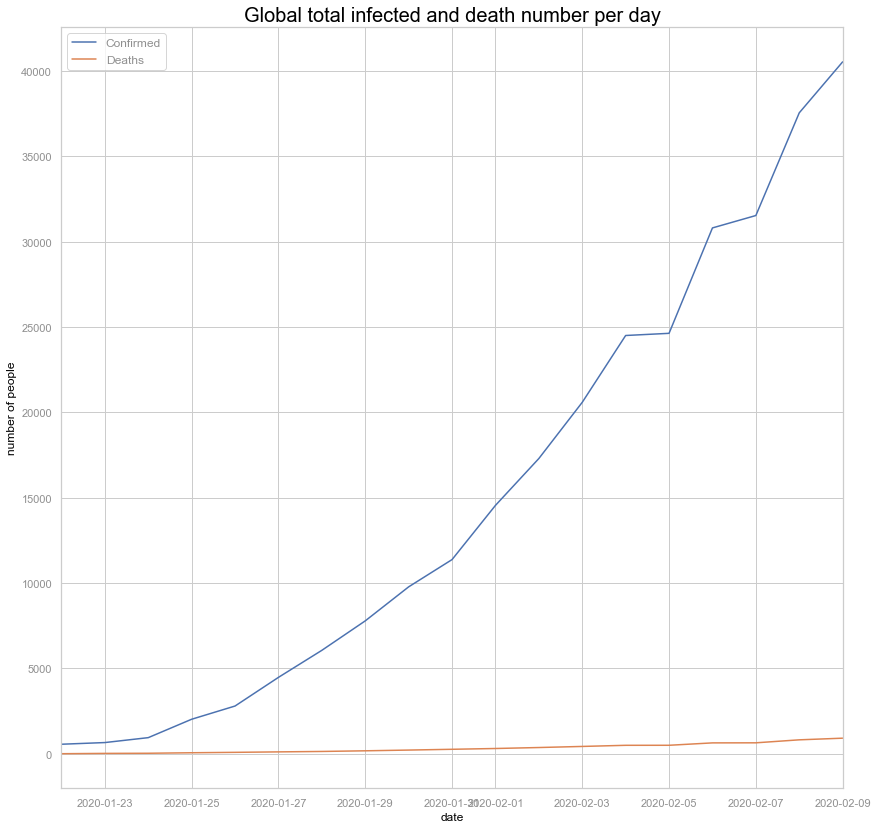

In [564]:
total_df.plot(figsize=[14,14])
plt.title('Global total infected and death number per day', fontsize=20,color='black') 
plt.xlabel('date', fontsize=12, color='black') 
plt.ylabel('number of people', fontsize=12, color='black') 
plt.legend(prop={'size':12}, loc=2) 

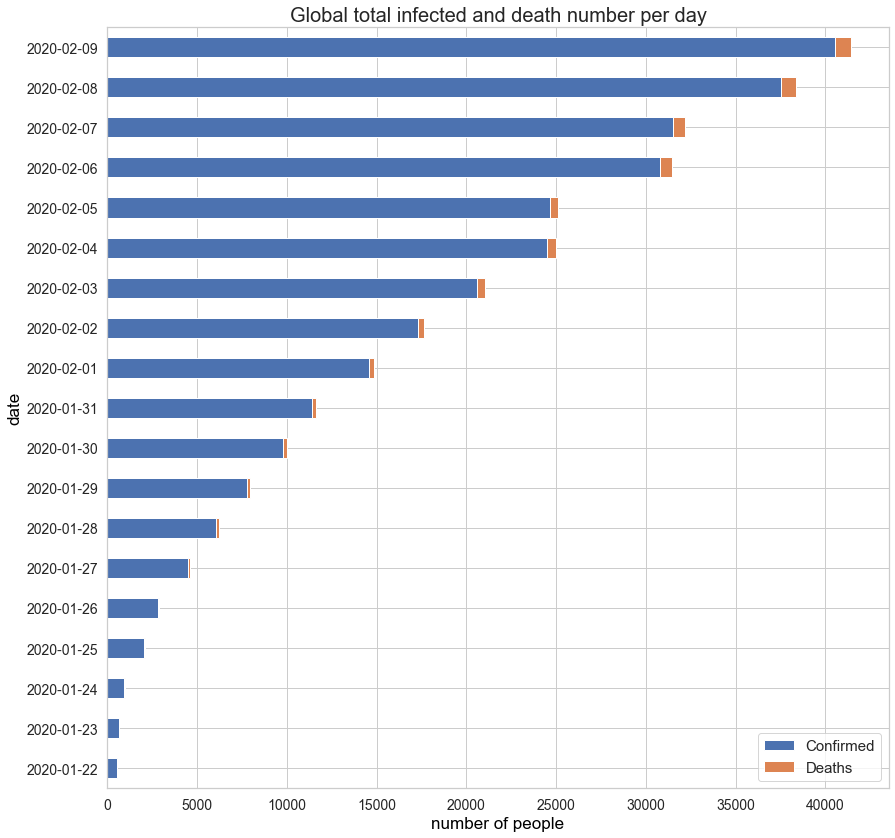

In [466]:
total_df.plot(kind='barh', stacked=True, fontsize=14, figsize=[14,14])
plt.title('Global total infected and death number per day', fontsize=20) 
plt.xlabel('number of people', fontsize=17, color='black') 
plt.ylabel('date', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=4) 

In [467]:
nCov['Country'].replace({'Mainland China':'China'},inplace=True)

In [468]:
nCov_china = nCov[nCov['Country']=='China']

In [469]:
china_df = nCov_china.groupby(['Date'])['Confirmed','Deaths'].sum()

In [470]:
china_df.reset_index(inplace=True)

In [471]:
china_df

,Date,Confirmed,Deaths
0,2020-01-22,549.0,0.0
1,2020-01-23,639.0,18.0
2,2020-01-24,916.0,26.0
3,2020-01-25,1979.0,56.0
4,2020-01-26,2737.0,80.0
5,2020-01-27,4409.0,107.0
6,2020-01-28,5970.0,132.0
7,2020-01-29,7678.0,170.0
8,2020-01-30,9658.0,213.0
9,2020-01-31,11221.0,259.0


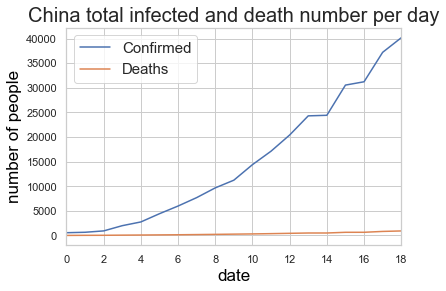

In [528]:
china_df.plot()
plt.title('China total infected and death number per day', fontsize=20) 
plt.xlabel('date', fontsize=17, color='black') 
plt.ylabel('number of people', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=2) 

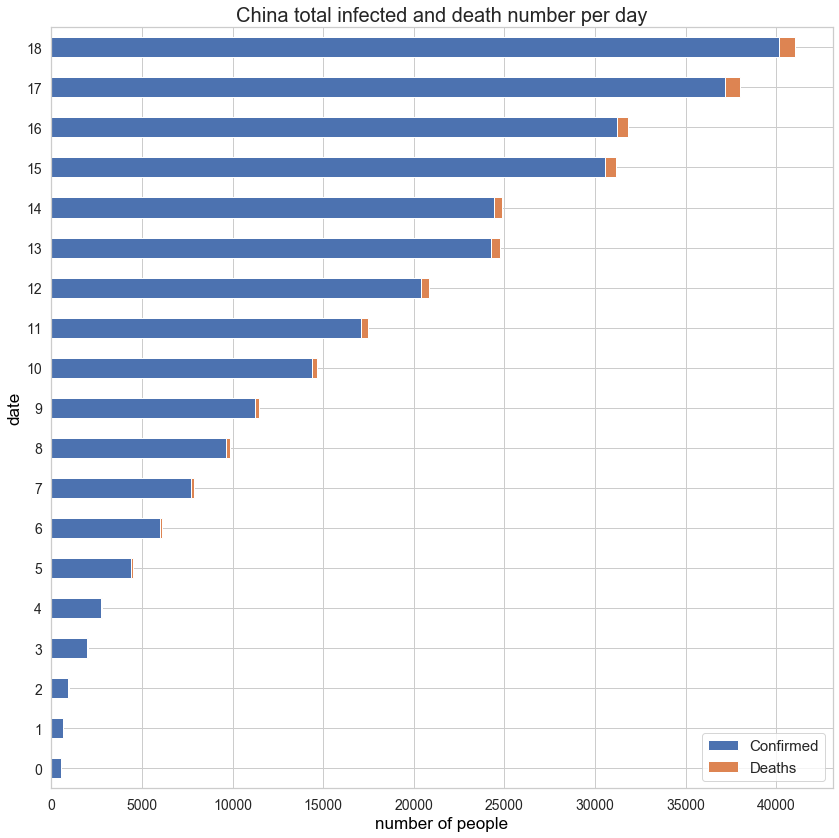

In [472]:
china_df.plot(kind='barh', stacked=True, fontsize=14, figsize=[14,14])
plt.title('China total infected and death number per day', fontsize=20) 
plt.xlabel('number of people', fontsize=17, color='black') 
plt.ylabel('date', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=4) 

In [538]:
percent_china = int(china_df.tail(1).Confirmed)/int(total_df.tail(1).Confirmed)
percent_china

0.9907242944543122

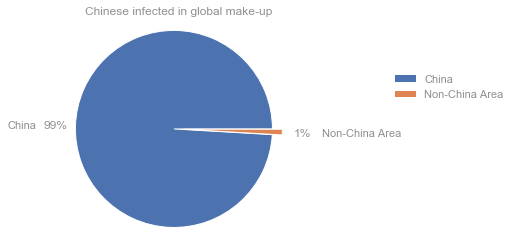

In [540]:
fig, ax = plt.subplots()
plt.rcParams['font.size']=12
labels = ['China', 
         'Non-China Area']
percentages = [percent_china, (1-percent_china)]
explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("Chinese infected in global make-up")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

# Animation

In [473]:
coordinates = pd.read_csv('cn.csv')

In [474]:
coordinates

,city,lat,lng,country,iso2,admin,capital,population,population_proper
0,Shanghai,31.222222,121.458056,China,CN,Shanghai,admin,14987000.0,14608512.0
1,Beijing,39.928819,116.388869,China,CN,Beijing,primary,11106000.0,7480601.0
2,Guangzhou,23.116667,113.250000,China,CN,Guangdong,admin,8829000.0,3152825.0
3,Shenzhen,22.533333,114.133333,China,CN,Guangdong,minor,7581000.0,1002592.0
4,Wuhan,30.583333,114.266667,China,CN,Hubei,admin,7243000.0,4184206.0
...,...,...,...,...,...,...,...,...,...
2182,Pucheng Chengguanzhen,34.956106,109.584061,China,CN,Shaanxi,minor,NaN,NaN
2183,Pubu,31.396250,90.009580,China,CN,Tibet,minor,NaN,NaN
2184,Muxi,28.959645,103.900865,China,CN,Sichuan,minor,NaN,NaN
2185,Chengdong,26.578611,118.738611,China,CN,Fujian,minor,NaN,NaN


In [475]:
coordinates=coordinates.loc[(coordinates.capital == 'admin')| (coordinates.capital == 'primary')].reset_index()
coordinates

,index,city,lat,lng,country,iso2,admin,capital,population,population_proper
0,0,Shanghai,31.222222,121.458056,China,CN,Shanghai,admin,14987000.0,14608512.0
1,1,Beijing,39.928819,116.388869,China,CN,Beijing,primary,11106000.0,7480601.0
2,2,Guangzhou,23.116667,113.250000,China,CN,Guangdong,admin,8829000.0,3152825.0
3,4,Wuhan,30.583333,114.266667,China,CN,Hubei,admin,7243000.0,4184206.0
4,5,Tianjin,39.142222,117.176667,China,CN,Tianjin,admin,7180000.0,3766207.0
5,6,Chongqing,29.562778,106.552778,China,CN,Chongqing,admin,6461000.0,3967028.0
6,7,Shenyang,41.792222,123.432778,China,CN,Liaoning,admin,4787000.0,3512192.0
7,9,Chengdu,30.666667,104.066667,China,CN,Sichuan,admin,4123000.0,3950437.0
8,12,Nanjing,32.061667,118.777778,China,CN,Jiangsu,admin,3679000.0,3087010.0
9,13,Guiyang,26.583333,106.716667,China,CN,Guizhou,admin,3662000.0,1171633.0


In [476]:
coordinates.drop('index',axis=1,inplace=True)

In [477]:
coordinates

,city,lat,lng,country,iso2,admin,capital,population,population_proper
0,Shanghai,31.222222,121.458056,China,CN,Shanghai,admin,14987000.0,14608512.0
1,Beijing,39.928819,116.388869,China,CN,Beijing,primary,11106000.0,7480601.0
2,Guangzhou,23.116667,113.250000,China,CN,Guangdong,admin,8829000.0,3152825.0
3,Wuhan,30.583333,114.266667,China,CN,Hubei,admin,7243000.0,4184206.0
4,Tianjin,39.142222,117.176667,China,CN,Tianjin,admin,7180000.0,3766207.0
5,Chongqing,29.562778,106.552778,China,CN,Chongqing,admin,6461000.0,3967028.0
6,Shenyang,41.792222,123.432778,China,CN,Liaoning,admin,4787000.0,3512192.0
7,Chengdu,30.666667,104.066667,China,CN,Sichuan,admin,4123000.0,3950437.0
8,Nanjing,32.061667,118.777778,China,CN,Jiangsu,admin,3679000.0,3087010.0
9,Guiyang,26.583333,106.716667,China,CN,Guizhou,admin,3662000.0,1171633.0


In [478]:
nCov_china=nCov_china.reset_index()

In [479]:
nCov_china = nCov_china.rename(columns={'Province/State':'admin'})

In [480]:
nCov_china = nCov_china[nCov_china.admin != 'Hong Kong']
nCov_china = nCov_china[nCov_china.admin != 'Macau']
nCov_china = nCov_china[nCov_china.admin != 'Taiwan']


In [481]:
nCov_china['admin'].unique()

array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin',
       'Liaoning', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong',
       'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang',
       'Yunnan', 'Zhejiang'], dtype=object)

In [482]:
new_cov_df = pd.merge(nCov_china, coordinates, on="admin")

In [483]:
new_cov_df['Date'] = new_cov_df['Date'].apply(lambda x: datetime.strftime(x, '%Y-%m-%d'))

In [484]:
new_cov_df

,Date,admin,Country,Last Update,Confirmed,Deaths,Recovered,city,lat,lng,country,iso2,capital,population,population_proper
0,2020-01-22,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0,Hefei,31.863889,117.280833,China,CN,admin,2035000.0,1388904.0
1,2020-01-23,Anhui,China,01/23/2020 12:00:00,9.0,0.0,0.0,Hefei,31.863889,117.280833,China,CN,admin,2035000.0,1388904.0
2,2020-01-24,Anhui,China,01/24/2020 12:00:00,15.0,0.0,0.0,Hefei,31.863889,117.280833,China,CN,admin,2035000.0,1388904.0
3,2020-01-25,Anhui,China,01/25/2020 12:00:00,60.0,0.0,0.0,Hefei,31.863889,117.280833,China,CN,admin,2035000.0,1388904.0
4,2020-01-26,Anhui,China,01/26/2020 23:00:00,70.0,0.0,0.0,Hefei,31.863889,117.280833,China,CN,admin,2035000.0,1388904.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,2020-02-05,Zhejiang,China,2020-05-02 15:13:00,895.0,0.0,78.0,Hangzhou,30.293650,120.161419,China,CN,admin,3007000.0,1878129.0
580,2020-02-06,Zhejiang,China,2020-06-02 10:53:00,954.0,0.0,94.0,Hangzhou,30.293650,120.161419,China,CN,admin,3007000.0,1878129.0
581,2020-02-07,Zhejiang,China,2020-07-02 11:33:00,1006.0,0.0,123.0,Hangzhou,30.293650,120.161419,China,CN,admin,3007000.0,1878129.0
582,2020-02-08,Zhejiang,China,2020-09-02 03:03:00,1075.0,0.0,185.0,Hangzhou,30.293650,120.161419,China,CN,admin,3007000.0,1878129.0


In [485]:
new_cov_df.drop(['city','country','iso2','capital','population','population_proper','Last Update'], axis=1,inplace=True)

# animation of infected chinese

In [486]:
times = new_cov_df.groupby(['Date'])['Date'].count().index.tolist()
frames_data = [new_cov_df.loc[new_cov_df['Date'] == t] for t in times]

In [487]:
frames= [go.Frame(data=[go.Densitymapbox(lat=f['lat'], lon=f['lng'], z=f['Confirmed'], radius=30)], name=str(f.iloc[0]['Date'])) for f in frames_data]

In [488]:
buttons=[
         dict(label="Play",method="animate",args=[None, {'fromcurrent':True, "transition": {"duration": 30, "easing": "quadratic-in-out"}}]),
         dict(label="Pause",method="animate",args=[[None], {"frame": {"duration": 0, "redraw": False},"mode": "immediate", "transition": {"duration": 0}}])
]


sliders_dict = {
    'active':0,
    'currentvalue': dict(font=dict(size=16), prefix='Time: ', visible=True),
    "transition": {"duration": 300, "easing": "cubic-in-out"},
    'x': 0,
    'steps': []
}

for i,t in enumerate(times):
    slider_step = {"args": [
                        [t],
                        {"frame": {"duration": 300, "redraw": False},
                         #"mode": "immediate",
                         "transition": {"duration": 30, "easing": "quadratic-in-out"}}
                    ],
            "label": t,
            "method": "animate",
            "value": t
    }
    sliders_dict['steps'].append(slider_step)
    

In [489]:
fig = go.Figure(data = [go.Densitymapbox(lat=new_cov_df['lat'], lon=new_cov_df['lng'], z=new_cov_df['Confirmed'], radius=10, colorscale='Hot', zmax=10000, zmin=0)],
               layout=go.Layout(updatemenus=[dict(type="buttons", buttons=buttons,showactive=True)] ), 
               frames=frames
)

fig.update_layout(mapbox_style="stamen-terrain", 
                  mapbox_center_lon=117,
                  mapbox_center_lat=31,
                  mapbox_zoom=2)

fig.update_layout(sliders=[sliders_dict],
                 title='China total confirmed number')

fig.update_layout(height=850)
fig.show()

# animation of death chinese

In [490]:
frames2= [go.Frame(data=[go.Densitymapbox(lat=f['lat'], lon=f['lng'], z=f['Deaths'], radius=30)], name=str(f.iloc[0]['Date'])) for f in frames_data]

In [491]:
fig = go.Figure(data = [go.Densitymapbox(lat=new_cov_df['lat'], lon=new_cov_df['lng'], z=new_cov_df['Deaths'], radius=10, colorscale='Hot', zmax=400, zmin=0)],
               layout=go.Layout(updatemenus=[dict(type="buttons", buttons=buttons,showactive=True)] ), 
               frames=frames
)

fig.update_layout(mapbox_style="stamen-terrain", 
                  mapbox_center_lon=117,
                  mapbox_center_lat=31,
                  mapbox_zoom=2)

fig.update_layout(sliders=[sliders_dict],
                 title='China total death number')

fig.update_layout(height=850)
fig.show()

# animation of infected people in global

In [501]:
nCov.reset_index(inplace=True)

In [502]:
nCov

,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2020-01-22,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,2020-01-22,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,2020-01-22,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,2020-01-22,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1122,2020-02-09,"Los Angeles, CA",United States,2020-02-01 19:53:03,1.0,0.0,0.0
1123,2020-02-09,"Madison, WI",United States,2020-02-05 21:53:02,1.0,0.0,0.0
1124,2020-02-09,"Orange, CA",United States,2020-02-01 19:53:03,1.0,0.0,0.0
1125,2020-02-09,"Seattle, WA",United States,2020-02-09 07:03:04,1.0,0.0,1.0


In [503]:
world_coordinates = pd.read_csv('concap.csv')

In [504]:
world_coordinates=world_coordinates.rename(columns={'CountryName':'Country'})

In [505]:
world_coordinates.head()

,Country,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,Somaliland,Hargeisa,9.550000,44.050000,NaN,Africa
1,South Georgia and South Sandwich Islands,King Edward Point,-54.283333,-36.500000,GS,Antarctica
2,French Southern and Antarctic Lands,Port-aux-Français,-49.350000,70.216667,TF,Antarctica
3,Palestine,Jerusalem,31.766667,35.233333,PS,Asia
4,Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe


In [506]:
nCov['Country'] = nCov['Country'].replace('Mainland China', 'China')
nCov['Country'] = nCov['Country'].replace('UK', 'United Kingdom')
nCov['Country'] = nCov['Country'].replace('US', 'United States')
nCov['Country'] = nCov['Country'].replace('Ivory Coast', "Cote d'Ivoire")

In [507]:
world_data = pd.merge(world_coordinates,nCov,on='Country')

In [508]:
world_data.drop(['CapitalName','CountryCode','ContinentName'],axis=1,inplace=True)

In [509]:
world_data.head(80)

,Country,CapitalLatitude,CapitalLongitude,Date,Province/State,Last Update,Confirmed,Deaths,Recovered
0,Australia,-35.266667,149.133333,2020-01-23,NaN,01/23/2020 12:00:00,0.0,0.0,0.0
1,Australia,-35.266667,149.133333,2020-01-25,NaN,01/25/2020 12:00:00,4.0,0.0,0.0
2,Australia,-35.266667,149.133333,2020-01-26,NaN,01/26/2020 23:00:00,4.0,0.0,0.0
3,Australia,-35.266667,149.133333,2020-01-27,New South Wales,01/27/2020 20:30:00,4.0,0.0,0.0
4,Australia,-35.266667,149.133333,2020-01-27,Victoria,01/27/2020 20:30:00,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
75,Canada,45.416667,-75.700000,2020-01-28,Ontario,01/28/2020 23:00:00,1.0,0.0,0.0
76,Canada,45.416667,-75.700000,2020-01-28,British Columbia,01/28/2020 23:00:00,1.0,0.0,0.0
77,Canada,45.416667,-75.700000,2020-01-29,Ontario,01/29/2020 21:00:00,2.0,0.0,0.0
78,Canada,45.416667,-75.700000,2020-01-29,British Columbia,01/29/2020 21:00:00,1.0,0.0,0.0


In [510]:
world_data['Date'] = world_data['Date'].apply(lambda x: datetime.strftime(x, '%Y-%m-%d'))

In [511]:
world_data = world_data.groupby(['Date','Country','CapitalLatitude','CapitalLongitude'])['Confirmed','Deaths'].sum()

In [512]:
world_data.reset_index(inplace=True)

In [513]:
world_data

,Date,Country,CapitalLatitude,CapitalLongitude,Confirmed,Deaths
0,2020-01-22,China,39.916667,116.383333,549.0,0.0
1,2020-01-22,Japan,35.683333,139.750000,2.0,0.0
2,2020-01-22,South Korea,37.550000,126.983333,1.0,0.0
3,2020-01-22,Thailand,13.750000,100.516667,2.0,0.0
4,2020-01-22,United States,38.883333,-77.000000,1.0,0.0
...,...,...,...,...,...,...
411,2020-02-09,Thailand,13.750000,100.516667,32.0,0.0
412,2020-02-09,United Arab Emirates,24.466667,54.366667,7.0,0.0
413,2020-02-09,United Kingdom,51.500000,-0.083333,3.0,0.0
414,2020-02-09,United States,38.883333,-77.000000,12.0,0.0


In [514]:
times = world_data.groupby(['Date'])['Date'].count().index.tolist()
frames_data = [world_data.loc[world_data['Date'] == t] for t in times]

In [515]:
frames= [go.Frame(data=[go.Densitymapbox(lat=f['CapitalLatitude'], lon=f['CapitalLongitude'], z=f['Confirmed'], radius=30)], name=str(f.iloc[0]['Date'])) for f in frames_data]

In [517]:
fig = go.Figure(data = [go.Densitymapbox(lat=world_data['CapitalLatitude'], lon=world_data['CapitalLongitude'], z=world_data['Confirmed'], radius=10, colorscale='Hot', zmax=100, zmin=0)],
               layout=go.Layout(updatemenus=[dict(type="buttons", buttons=buttons,showactive=True)] ), 
               frames=frames
)

fig.update_layout(mapbox_style="stamen-terrain", 
                  mapbox_center_lon=117,
                  mapbox_center_lat=31,
                  mapbox_zoom=1)

fig.update_layout(sliders=[sliders_dict],
                 title='Global total confirmed number')

fig.update_layout(height=850)
fig.show()